# Funciones de distribución de probabilidades


##### Distribución uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100121.,  99967.,  99972., 100059., 100097.,  99618., 100086.,
        100130., 100380.,  99570.]),
 array([ 1.00009857, 10.90006346, 20.80002835, 30.69999325, 40.59995814,
        50.49992304, 60.39988793, 70.29985282, 80.19981772, 90.09978261,
        99.9997475 ]),
 <BarContainer object of 10 artists>)

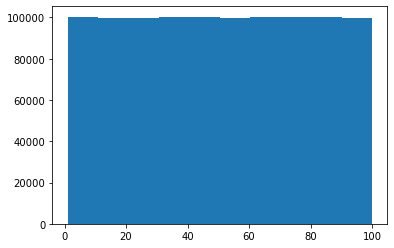

In [3]:
%matplotlib inline
plt.hist(data)

## Ditribución normal

In [7]:
data = np.random.randn(1000000)

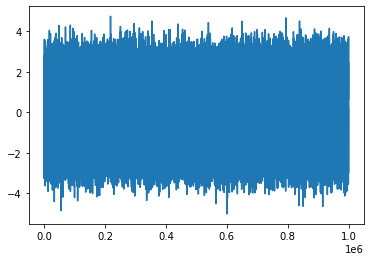

In [8]:
x = range(1,1000001)
plt.plot(x, data)

(array([3.00000e+01, 1.04800e+03, 1.73260e+04, 1.14710e+05, 3.13920e+05,
        3.53463e+05, 1.64814e+05, 3.20650e+04, 2.53400e+03, 9.00000e+01]),
 array([-5.01624785, -4.03986303, -3.06347822, -2.0870934 , -1.11070859,
        -0.13432377,  0.84206104,  1.81844586,  2.79483068,  3.77121549,
         4.74760031]),
 <BarContainer object of 10 artists>)

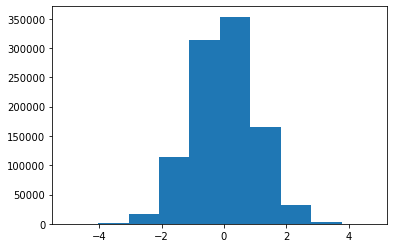

In [9]:
%matplotlib inline
plt.hist(data)

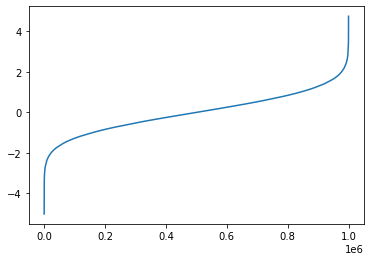

In [10]:
plt.plot(x,sorted(data))

(array([   5.,   51.,  342., 1277., 2561., 2964., 1915.,  716.,  149.,
          20.]),
 array([-4.72672725, -2.78300466, -0.83928206,  1.10444053,  3.04816312,
         4.99188571,  6.9356083 ,  8.87933089, 10.82305348, 12.76677607,
        14.71049866]),
 <BarContainer object of 10 artists>)

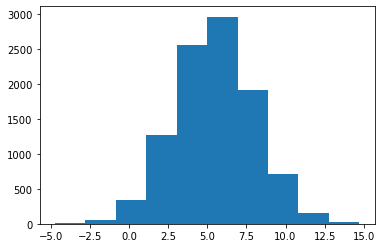

In [11]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z  #tipificar 
plt.hist(data)

In [12]:
# Generar un data set aleatorio.
data = np.random.randn(2,4)
data

array([[ 0.47425075, -1.38749992, -1.95339635,  0.8569192 ],
       [-1.37807397,  0.28843974, -0.78243668,  1.08585745]])

# La simulación de montecarlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [13]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1387199999999997


(3.1387199999999997, [<matplotlib.lines.Line2D at 0x7f27743213a0>])

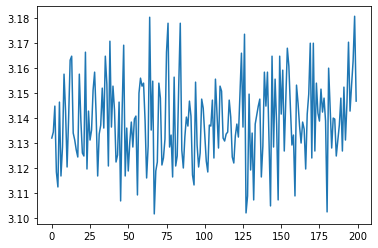

In [14]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [15]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [16]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001195,1.501031,18.498630
std,0.999684,2.500597,7.791265
min,-4.961842,-10.173257,5.000063
25%,-0.675679,-0.184454,11.748444
50%,-0.000635,1.500769,18.501834
75%,0.672262,3.185471,25.236277
max,4.880109,13.074878,31.999973


(array([2.80000e+01, 1.33600e+03, 2.08810e+04, 1.30339e+05, 3.31412e+05,
        3.43776e+05, 1.45228e+05, 2.52000e+04, 1.75300e+03, 4.70000e+01]),
 array([-4.96184177, -3.97764668, -2.9934516 , -2.00925651, -1.02506142,
        -0.04086634,  0.94332875,  1.92752384,  2.91171893,  3.89591401,
         4.8801091 ]),
 <BarContainer object of 10 artists>)

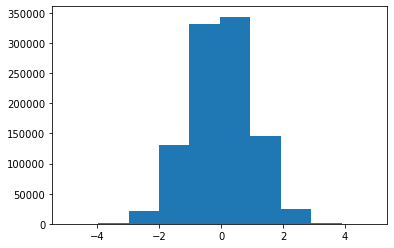

In [17]:
plt.hist(data["A"])

(array([1.09000e+02, 2.32600e+03, 2.75730e+04, 1.41070e+05, 3.21000e+05,
        3.26396e+05, 1.48511e+05, 3.01080e+04, 2.79400e+03, 1.13000e+02]),
 array([-10.17325658,  -7.84844313,  -5.52362967,  -3.19881622,
         -0.87400277,   1.45081069,   3.77562414,   6.10043759,
          8.42525104,  10.7500645 ,  13.07487795]),
 <BarContainer object of 10 artists>)

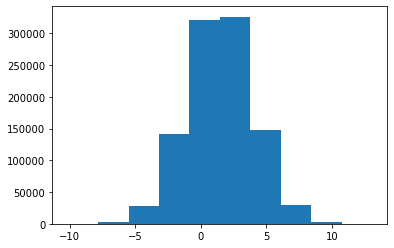

In [18]:
plt.hist(data["B"])

(array([100149.,  99813.,  99777., 100050., 100151.,  99776., 100717.,
        100163.,  99797.,  99607.]),
 array([ 5.00006317,  7.70005418, 10.4000452 , 13.10003621, 15.80002722,
        18.50001823, 21.20000925, 23.90000026, 26.59999127, 29.29998228,
        31.9999733 ]),
 <BarContainer object of 10 artists>)

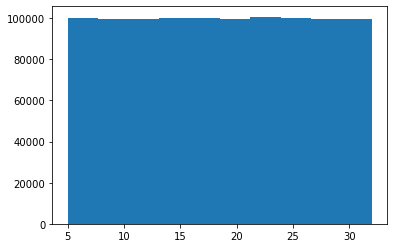

In [19]:
plt.hist(data["C"])

In [20]:
data_url = "https://raw.githubusercontent.com/jluislarahdz/cursomachinelearning/luislaramachine/customer-churn-model/Customer%20Churn%20Model.txt"

In [21]:
data = pd.read_csv(data_url)

In [23]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [24]:
colum_names = data.columns.values.tolist()

In [25]:
a = len(colum_names)
a

21

In [26]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [27]:
new_data

,Column Name,A,B
42,State,0.582195,0.912046
43,Account Length,0.680144,0.943124
44,Area Code,0.672542,0.426277
45,Phone,-0.686003,0.053406
46,Int'l Plan,0.944609,0.958684
47,VMail Plan,1.656908,0.829310
48,VMail Message,0.427481,0.756606
49,Day Mins,1.132831,0.061076
50,Day Calls,-0.750247,0.041520
51,Day Charge,0.042208,0.418479
